<a href="https://colab.research.google.com/github/harikrishna0007/Hari_Data690/blob/main/Assignment05/Assignment05_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500,6), 0)

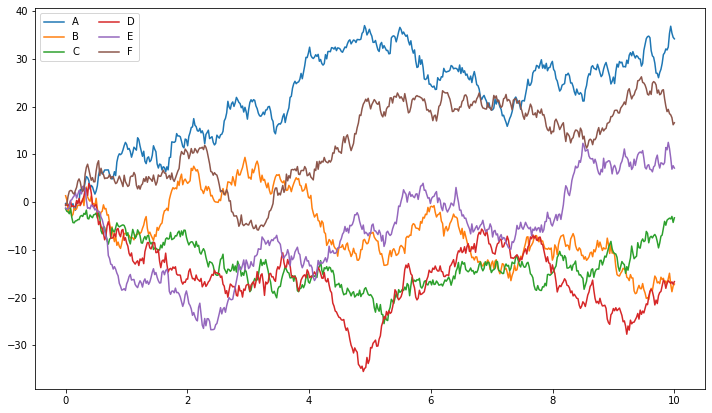

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [4]:
import requests
import pandas as pd

In [5]:
# Cryptowatch service

def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [6]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-02-28 16:12:05.326333')

In [7]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [8]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [9]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-28 17:00:00,40860.33,41341.18,40710.00,41008.37,291.623181,1.197708e+07
2022-02-28 18:00:00,41031.78,41432.91,40524.73,41432.91,192.789480,7.895582e+06
2022-02-28 19:00:00,41432.91,41476.20,41032.06,41233.87,71.233382,2.939200e+06
2022-02-28 20:00:00,41228.49,41406.03,41036.37,41362.52,114.268970,4.709201e+06
2022-02-28 21:00:00,41361.99,41971.00,41284.11,41914.97,247.151654,1.028125e+07


In [10]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,41344.847811,41563.571834,41102.122189,41338.878462,84.976971,3.558795e+06
std,2217.846667,2264.425681,2192.703734,2223.733326,86.164373,3.699151e+06
min,37800.000000,37994.520000,37592.730000,37800.000000,6.009950,2.374006e+05
25%,39095.940000,39268.270000,38943.610000,39100.000000,28.690754,1.182265e+06
50%,41441.610000,41558.950000,41251.380000,41439.510000,52.686673,2.195698e+06
75%,43536.140000,43859.520000,43333.000000,43564.730000,104.306033,4.243252e+06
max,44858.140000,45332.380000,44454.990000,44822.340000,527.540571,2.270716e+07


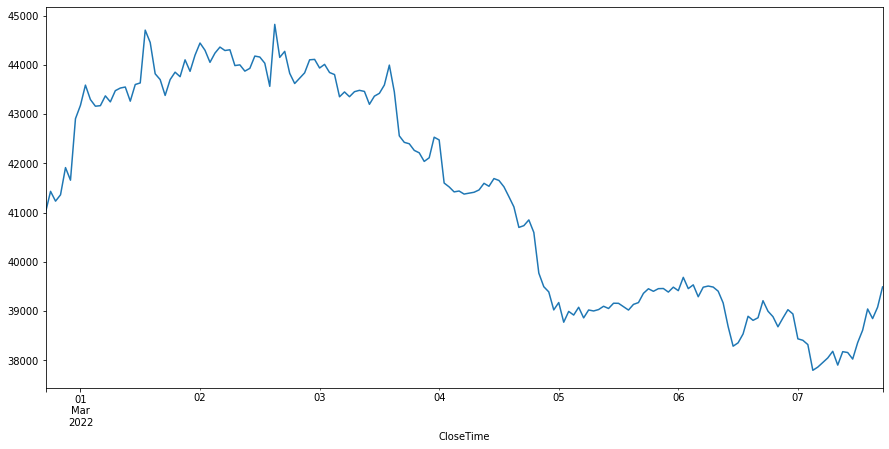

In [11]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [12]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-28 17:00:00,2817.06,2833.64,2797.98,2809.10,1816.078366,5.115178e+06
2022-02-28 18:00:00,2810.24,2820.17,2788.11,2813.88,1171.992428,3.287140e+06
2022-02-28 19:00:00,2819.99,2823.07,2796.15,2808.93,655.915702,1.841015e+06
2022-02-28 20:00:00,2804.78,2810.52,2792.75,2809.12,664.500389,1.861011e+06
2022-02-28 21:00:00,2809.90,2840.06,2797.17,2837.11,848.240556,2.393858e+06


In [13]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,2772.744320,2788.062604,2754.830473,2771.583314,453.633959,1.271738e+06
std,152.885491,157.285452,149.544266,153.512326,392.837647,1.104842e+06
min,2520.400000,2529.590000,2484.140000,2519.960000,18.214868,4.861574e+04
25%,2637.030000,2648.440000,2622.760000,2636.160000,152.927836,4.150507e+05
50%,2733.100000,2749.720000,2720.490000,2735.390000,342.900696,9.828469e+05
75%,2923.690000,2935.710000,2906.290000,2925.000000,621.061388,1.727957e+06
max,3020.000000,3045.710000,2991.440000,3020.540000,2020.326040,5.415215e+06


In [14]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [15]:
output_notebook()

In [16]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [17]:
writer = pd.ExcelWriter('cryptos.xlsx')


writer.save()

In [18]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [19]:
eth.to_excel(writer, sheet_name='Ether')

In [20]:
writer.save()